In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO



     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
import tomoAO
tomoAO.__version__

'0.0.3'

In [3]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/"
config_file = "config.ini"

# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

In [4]:
from OOPAO.Source import Source
# to create a natural guide star in I band of magnitude 5
ngs = Source(magnitude = config_vars["lgs_magnitude"],
             optBand   = config_vars["lgs_opticalBand"],
             altitude= config_vars["lgs_altitude"],
             coordinates=[10, 0])


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------




------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |  30.00   
------------------------------------



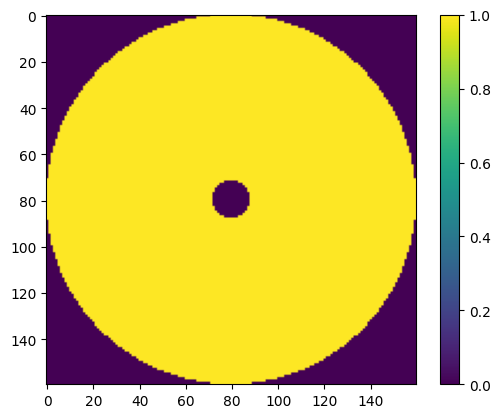

In [5]:
from OOPAO.Telescope import Telescope



sensing_wavelength = ngs.wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = config_vars["nSubaperture"]                  # number of subaperture across the diameter
diameter           = config_vars["diameter"]                   # diameter of the support of the phase screens in [m]
resolution         = config_vars["resolution"]     # resolution of the phase screens in pixels
# pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = config_vars["centralObstruction"]                 # central obstruction in fraction of the telescope diameter
sampling_time      = config_vars["samplingTime"]             # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"]


# initialize the telescope object
tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)

plt.imshow(tel.pupil)
plt.colorbar()

In [6]:
ngs**tel


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

Creation of layer1/1 ...
-> Computing the initial phase screen...
initial phase screen : 0.032441139221191406 s
ZZt.. : 7.397340774536133 s
ZXt.. : 0.6498353481292725 s
XXt.. : 0.29918479919433594 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     5     | 45.0  |  1e+04   |   100    |  9.700   |
r0 @ 500 nm [m] |   0.16   
L0 [m]          |   50.0   
Tau0 [s]        |  0.0011  
V0 [m/s]        |  45.00   
Frequency [Hz]  |  1000.0  
-------------------------------------------------------------



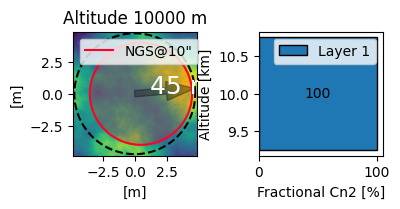

In [7]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)
tel+atm
atm.display_atm_layers()

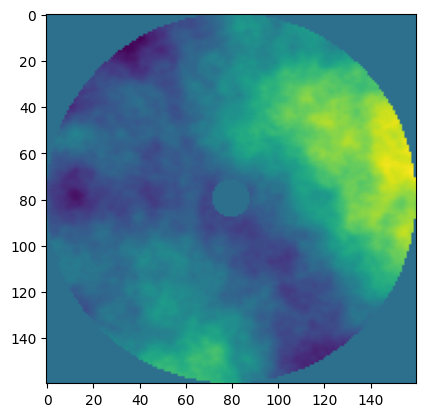

In [8]:
plt.imshow(ngs.OPD)

In [9]:
from OOPAO.DeformableMirror import DeformableMirror
mechanical_coupling = 0.1458
dm_fried = DeformableMirror(  telescope    = tel,
                        nSubap       = n_subaperture, # by default n_subaperture+1 actuators are considered (Fried Geometry)
                        mechCoupling = mechanical_coupling)


dm_fried.coefs = 0

ngs**tel*dm_fried




No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------




------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done
OOPAO Warning: 
All Detector Noises are disables with the geometric WFS

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   624   
Spot Sampling [pix]      |  2.00   
Geometric WFS           

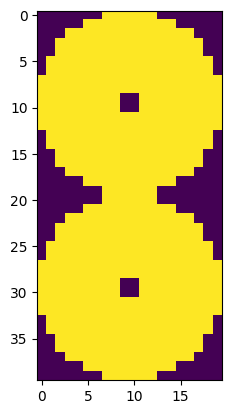

In [10]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      src                = ngs,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.1)


plt.imshow(shwfs.signal_2D)




In [11]:
from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
M2C_KL = compute_KL_basis(src=ngs,tel=tel,atm=atm,dm=dm_fried)

TIME ELAPSED: 3 sec. COMPLETED: 100 %
NMAX =  355
RMS opd error = [[1.71395560e-08 2.05824385e-08 2.05824385e-08]]
RMS Positions = [[7.00053659e-08 6.66058857e-07 6.66058857e-07]]
MAX Positions = [[7.64935592e-07 1.48894032e-06 1.48894032e-06]]
KL WITH DOUBLE DIAGONALISATION: COVARIANCE ERROR =  6.152139785229546e-14


In [12]:
# from OOPAO.tools.displayTools import displayMap

# dm_fried.coefs = M2C_KL[:,:9]
# ngs**tel*dm_fried
# displayMap(ngs.OPD)

In [13]:
tel.display_optical_path = False
from OOPAO.calibration.InteractionMatrix import InteractionMatrix

# modal interaction matrix
calib_modal = InteractionMatrix( ngs            = ngs,
                                 atm            = atm,                   
                                 tel            = tel,              
                                 dm             = dm_fried,         
                                 wfs            = shwfs,            
                                 M2C            = M2C_KL[:,:300],   # M2C matrix to use for the calibration
                                 stroke         = 1e-9,             # stroke for the calibration in [nm]
                                 nMeasurements  = 1,               # number of measurements in parallel
                                 noise          = 'off')         # enable noise during the calibration


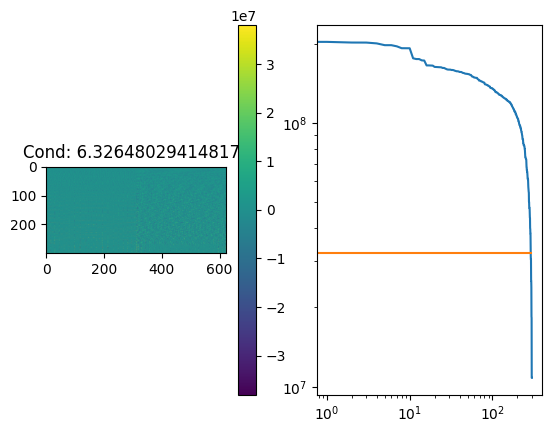

In [14]:
calib_modal.nTrunc = 10

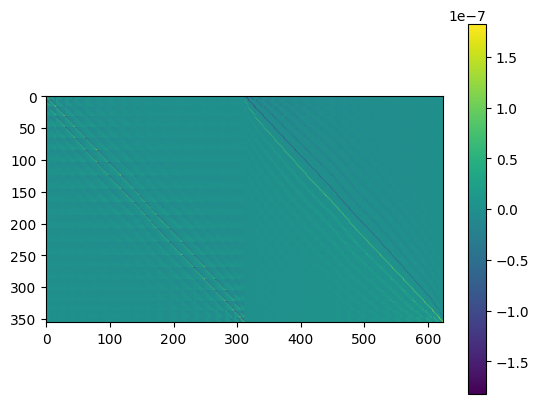

In [15]:
reconstructor = M2C_KL[:,:300]@calib_modal.M

plt.imshow(reconstructor)
plt.colorbar()

-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   640   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

NGS(H) ~~> atmosphere ~~> telescope ~~> deformableMirror ~~> detector


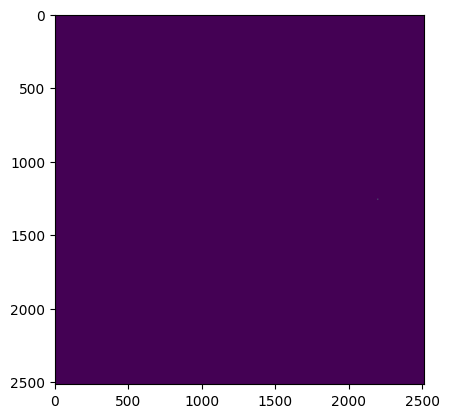

In [16]:
from OOPAO.Detector import Detector

src_cam = Detector(tel.resolution*4)
src_cam.psf_sampling = 4
src_cam.integrationTime = tel.samplingTime*1


# Define a scientific source:
SciSrc = Source('H',0, coordinates=[10, 0])

ngs.resetOPD()

dm = dm_fried
dm_fried.coefs=0      # initialize DM commands


tel+atm # combine tel and atm to enable turbulence

tel.computePSF(4)

# These are the calibration data used to close the loop
calib_CL    = calib_modal
M2C_CL      = M2C_KL[:,:300]

# initialize DM commands
SciSrc**tel*dm*src_cam
SciSrc.print_optical_path()


nLoop = 50

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal)*0

# loop parameters
gainCL                  = 0.4
display                 = True

reconstructor = M2C_CL@calib_CL.M


tel-atm
SciSrc**tel*dm*src_cam
plt.imshow(src_cam.frame)
plt.show()
src_cam.reference_frame = src_cam.frame.copy()
tel+atm


In [17]:
np.save('/home/joaomonteiro/Desktop/oopao_test_files/reconstructor_single.npy', reconstructor)


In [18]:
# reconstructor = np.load('/home/joaomonteiro/Desktop/oopao_test_files/reconstructor_ast.npy')

# print(reconstructor.shape)

In [19]:
ngs


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

Iter 0
dm OPD mean: 0.0
wfsSignal mean: 0.0
Loop-1/50 AO residual: 0.0 nm



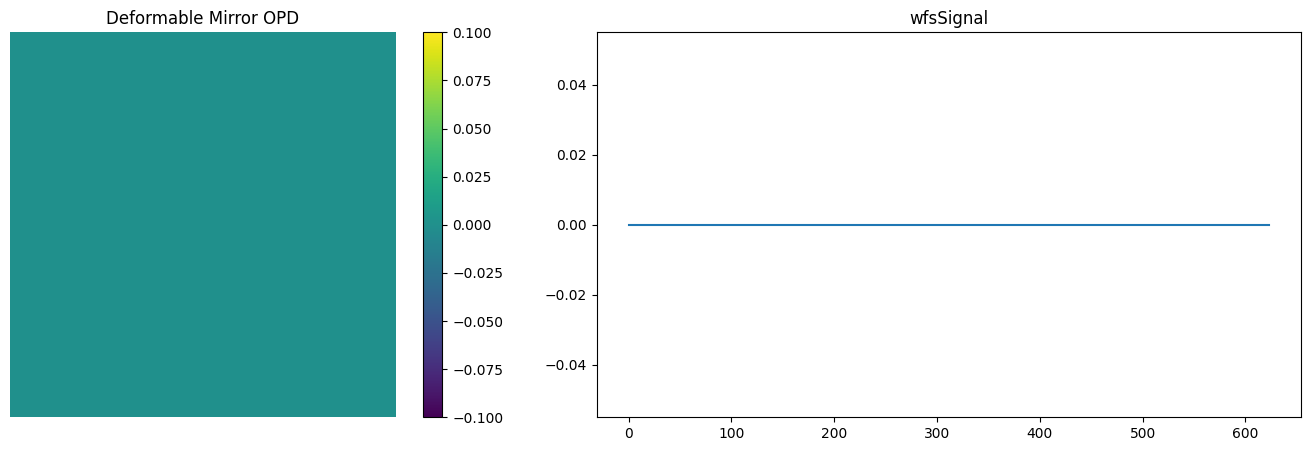

Iter 1
dm OPD mean: 5.562171785623084e-09
wfsSignal mean: 0.19712541363218916
Loop0/50 AO residual: 930.0443981346676 nm



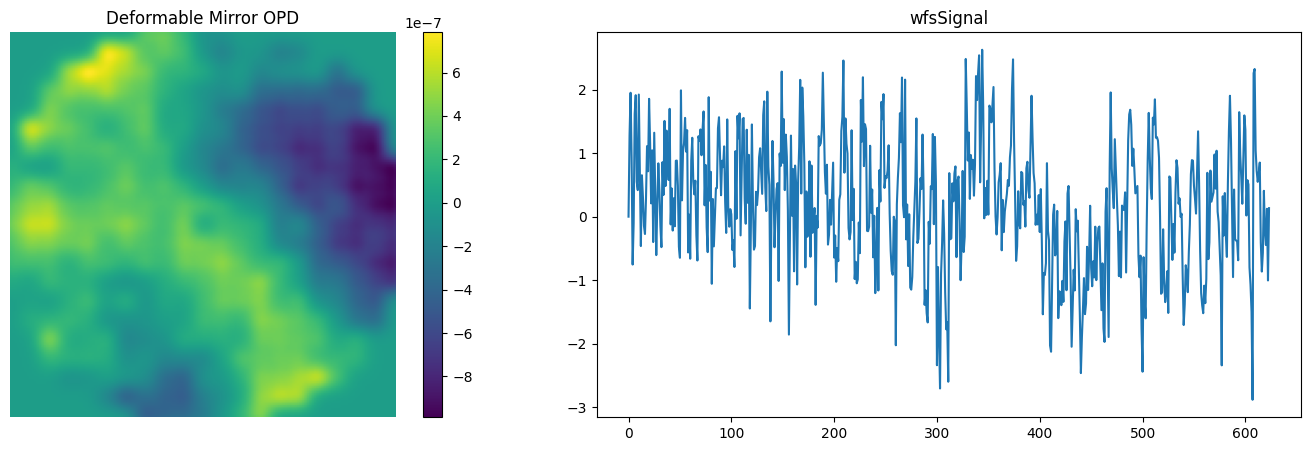

Iter 2
dm OPD mean: 8.984629741073084e-09
wfsSignal mean: 0.20369205051484734
Loop1/50 AO residual: 567.2170592102972 nm



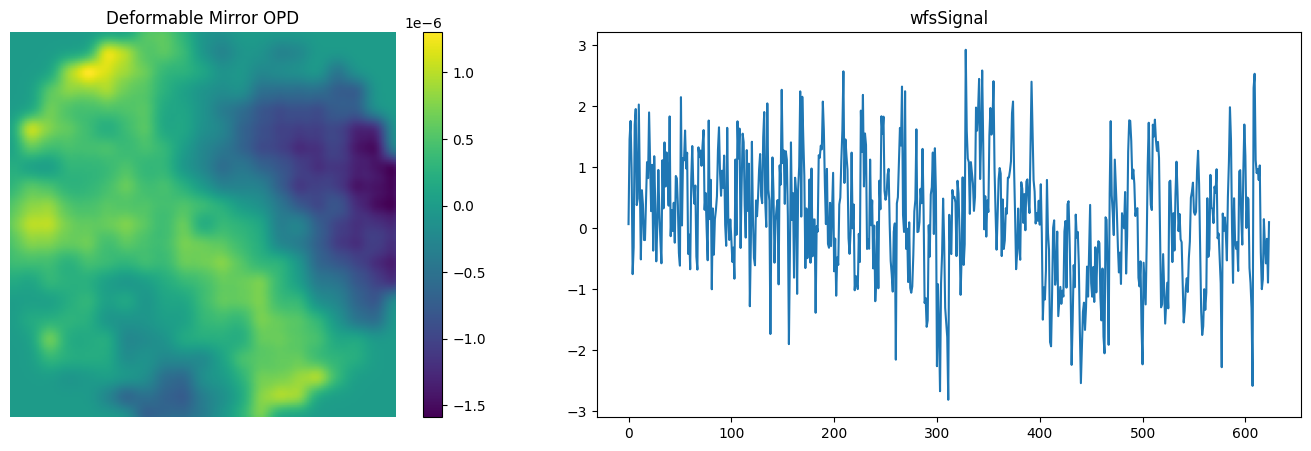

Iter 3
dm OPD mean: 1.1130608900548017e-08
wfsSignal mean: 0.21095942625713604
Loop2/50 AO residual: 353.84914315383 nm



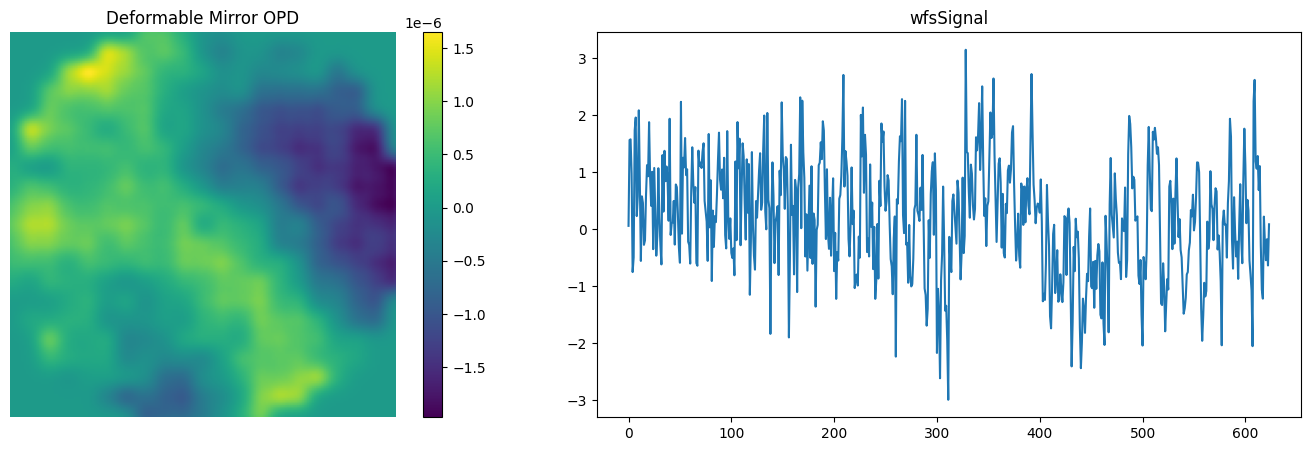

Iter 4
dm OPD mean: 1.24563399989796e-08
wfsSignal mean: 0.21781170168335934
Loop3/50 AO residual: 232.6630348578196 nm



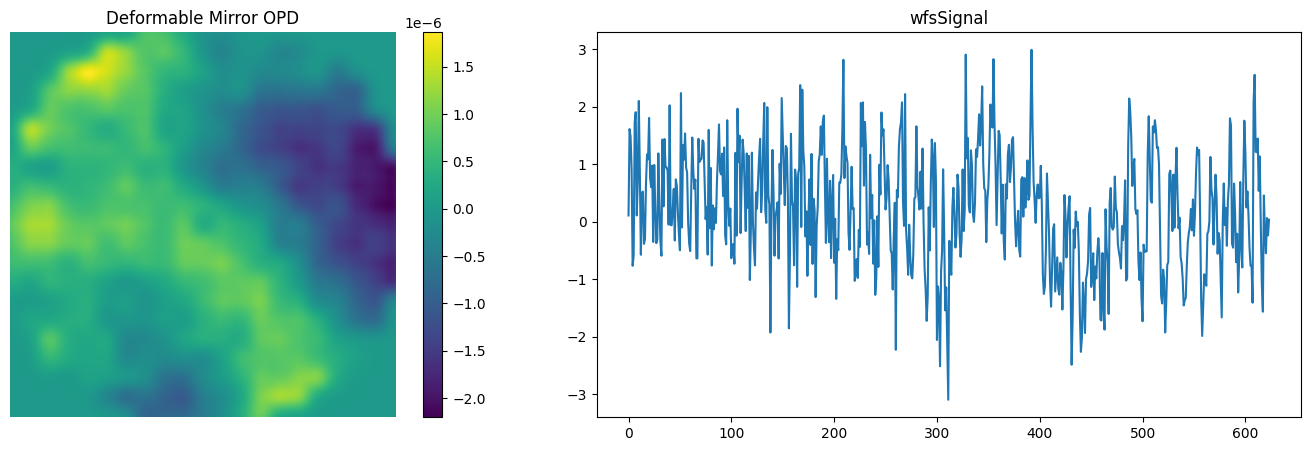

Iter 5
dm OPD mean: 1.3274945301108366e-08
wfsSignal mean: 0.22423016992267344
Loop4/50 AO residual: 168.8815410397939 nm



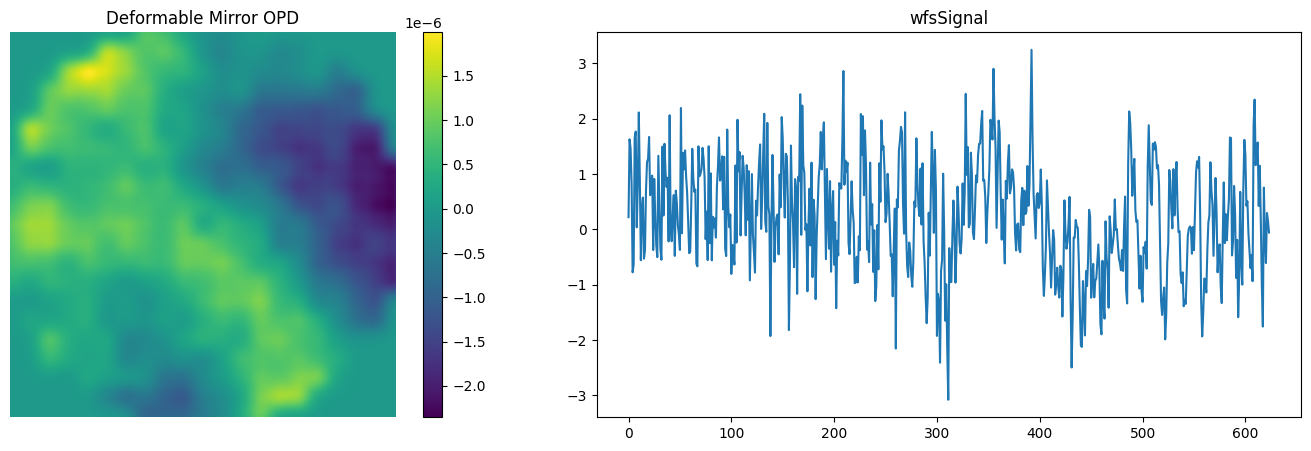

Iter 10
dm OPD mean: 1.6344713552135587e-08
wfsSignal mean: 0.2481241229117723
Loop9/50 AO residual: 122.17170374104283 nm



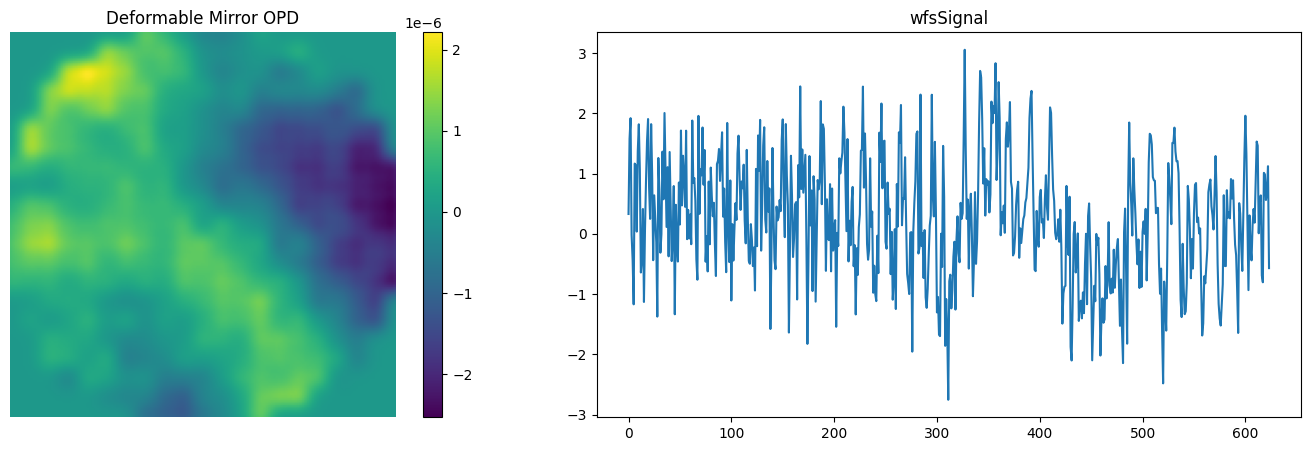

Iter 20
dm OPD mean: 2.1921131199440128e-08
wfsSignal mean: 0.24137379743572326
Loop19/50 AO residual: 124.49649387859569 nm



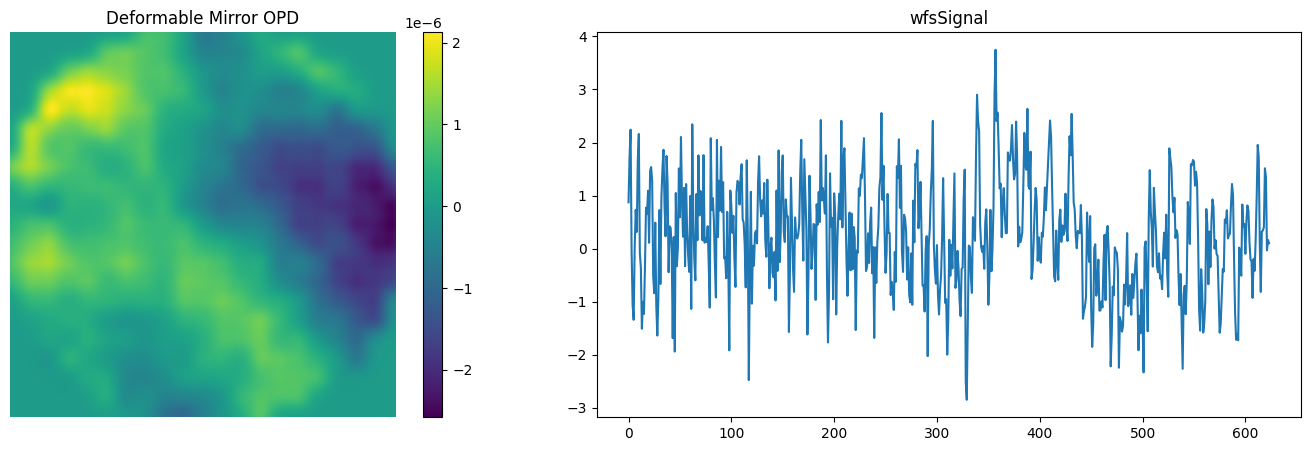

Iter 30
dm OPD mean: 2.2496606540690505e-08
wfsSignal mean: 0.23163431189835032
Loop29/50 AO residual: 128.5353260261484 nm



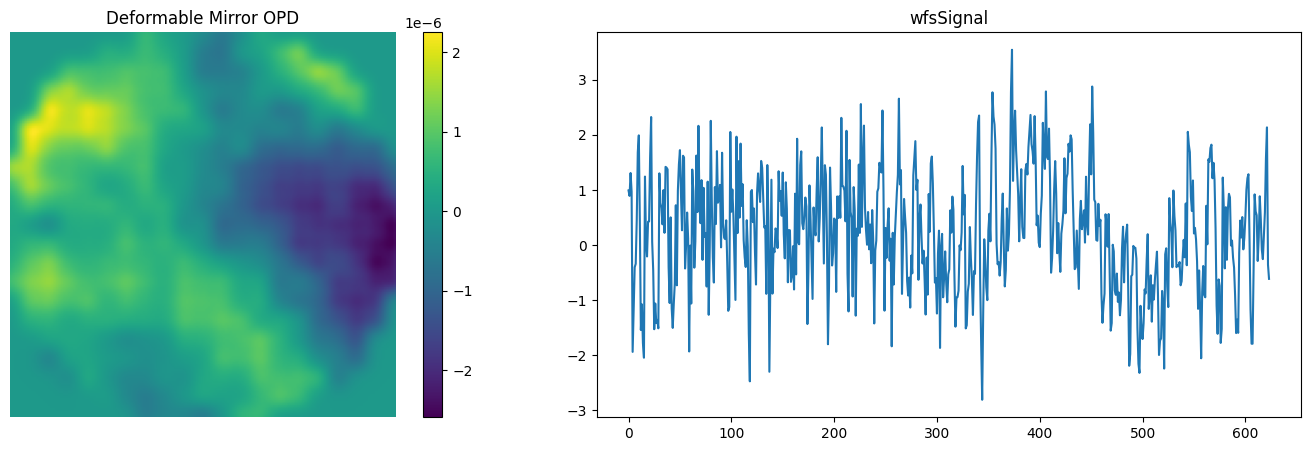

Iter 40
dm OPD mean: 2.1834710649182224e-08
wfsSignal mean: 0.25548719541808357
Loop39/50 AO residual: 132.32470917660518 nm



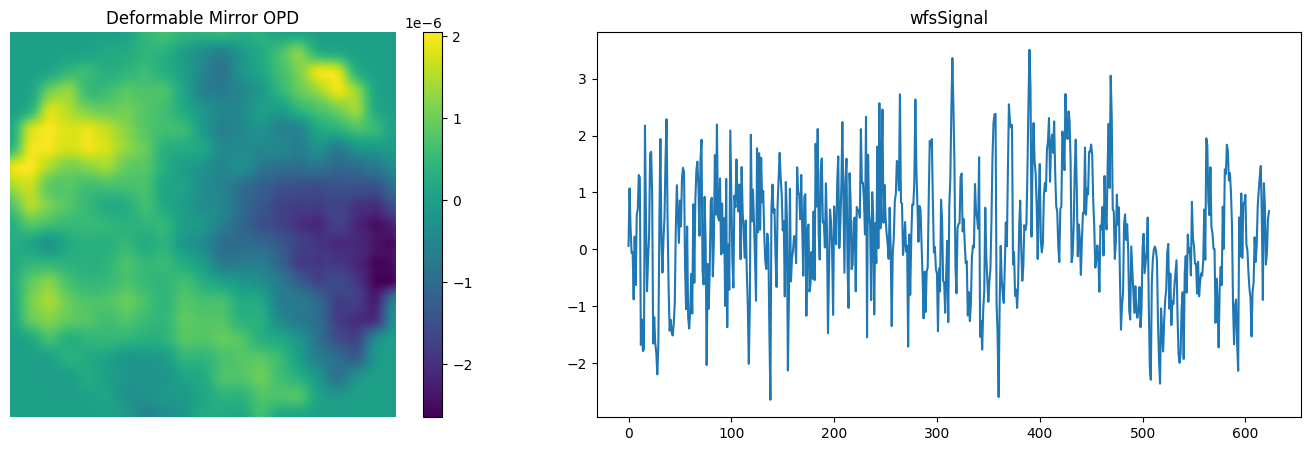

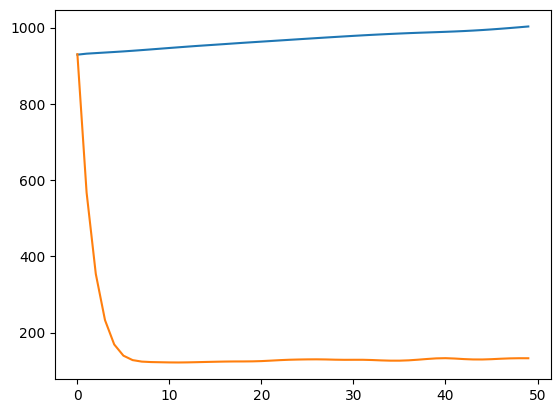

In [20]:
ngs**tel*dm*shwfs

for i in range(nLoop):

    # update phase screens => overwrite tel.OPD and consequently tel.src.phase
    atm.update()

    # save phase variance
    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    # save turbulent phase
    # propagate to the WFS with the CL commands applied
    ngs**tel*shwfs*dm

    if i < 6 or i%10 == 0:

        print(f"Iter {i}")
        print(f"dm OPD mean: {np.mean(dm.OPD)}")
        print(f"wfsSignal mean: {np.mean(wfsSignal)}")
        print('Loop'+str(i-1)+'/'+str(nLoop)+' AO residual: '+str(residual[i-1])+' nm')
        print()

        fig, axes = plt.subplots(1, 2, figsize=(20, 5))

        im = axes[0].imshow(dm.OPD)
        axes[0].axis('off')
        axes[0].set_title(f'Deformable Mirror OPD')
        fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

        axes[1].plot(wfsSignal)
        axes[1].set_title(f'wfsSignal')

        plt.show()


    # propagate to the source with the CL commands applied
    SciSrc**tel*dm*src_cam
    

    wfsSignal=shwfs.signal

    # if i < 6:
    #     print(f"iter {i} -> dm.coefs mean: {np.mean(dm.coefs)}")
    #     plt.plot(dm.coefs)
    #     plt.show()

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)


    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9
    # print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')



# plot when done
plt.figure()
plt.plot(total)
plt.plot(residual)

OOPAO SR: 0.775803183069637, SpaceODT SR: 0.8164460382548394


/tmp/ipykernel_8371/2332309299.py:15: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.abs(src_cam.frame)))


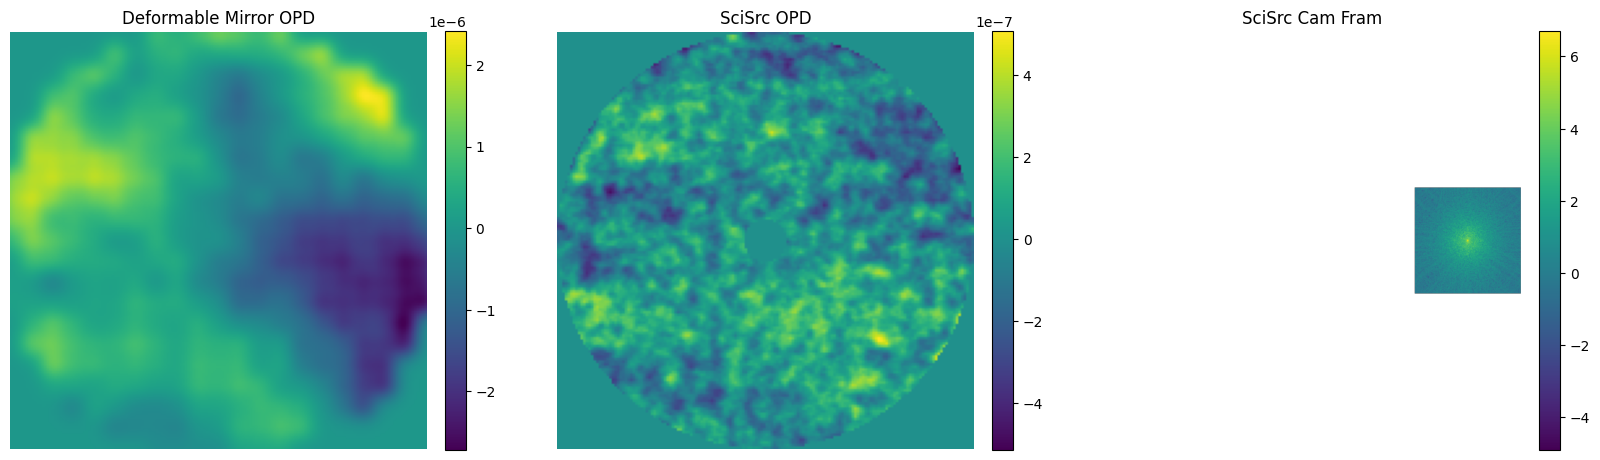

In [21]:
print(f"OOPAO SR: {SR[-1]}, SpaceODT SR: {np.max(src_cam.frame)/np.max(src_cam.reference_frame)}")

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

im = axes[0].imshow(dm_fried.OPD)
axes[0].axis('off')
axes[0].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

im = axes[1].imshow(SciSrc.OPD)
axes[1].axis('off')
axes[1].set_title(f'SciSrc OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow(np.log10(np.abs(src_cam.frame)))
axes[2].axis('off')
axes[2].set_title(f'SciSrc Cam Fram')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

In [22]:
ngs, SciSrc, atm

(
 ------------- Source --------------
 Source                   |   NGS   
 Wavelength [m]           | 5.9e-07 
 Zenith [arcsec]          |  10.00  
 Azimuth [°]              |  0.00   
 Altitude [m]             |   inf   
 Magnitude                |  0.00   
 Flux [photon/m²/s]       | 9.0e+09 
 Coordinates [arcsec,deg] | [10,0]
 -----------------------------------,
 
 ------------- Source --------------
 Source                   |   NGS   
 Wavelength [m]           | 1.7e-06 
 Zenith [arcsec]          |  10.00  
 Azimuth [°]              |  0.00   
 Altitude [m]             |   inf   
 Magnitude                |  0.00   
 Flux [photon/m²/s]       | 2.9e+09 
 Coordinates [arcsec,deg] | [10,0]
 -----------------------------------,
 
 ------------------------ Atmosphere -------------------------
  Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
        |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
    1   |     5     | 45.0  |  1e+04   |   100    |  9.700   |
 r0 

: 